<a href="https://colab.research.google.com/github/rajim0112/GitHubDemo/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/train.csv")
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [ ]:
df.shape

(29451, 12)

In [ ]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [ ]:
df.dtypes

,0
POSTED_BY,object
UNDER_CONSTRUCTION,int64
RERA,int64
BHK_NO.,int64
BHK_OR_RK,object
SQUARE_FT,float64
READY_TO_MOVE,int64
RESALE,int64
ADDRESS,object
LONGITUDE,float64


In [ ]:
df.isnull().sum()

,0
POSTED_BY,0
UNDER_CONSTRUCTION,0
RERA,0
BHK_NO.,0
BHK_OR_RK,0
SQUARE_FT,0
READY_TO_MOVE,0
RESALE,0
ADDRESS,0
LONGITUDE,0


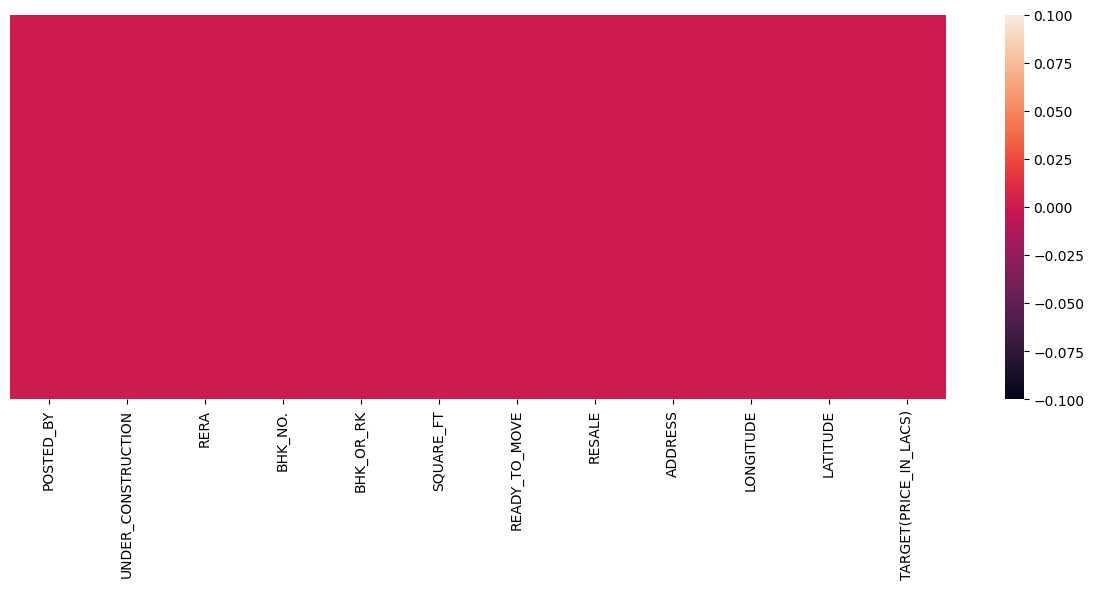

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [ ]:
X=df.drop(columns='TARGET(PRICE_IN_LACS)')
y=df['TARGET(PRICE_IN_LACS)']

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

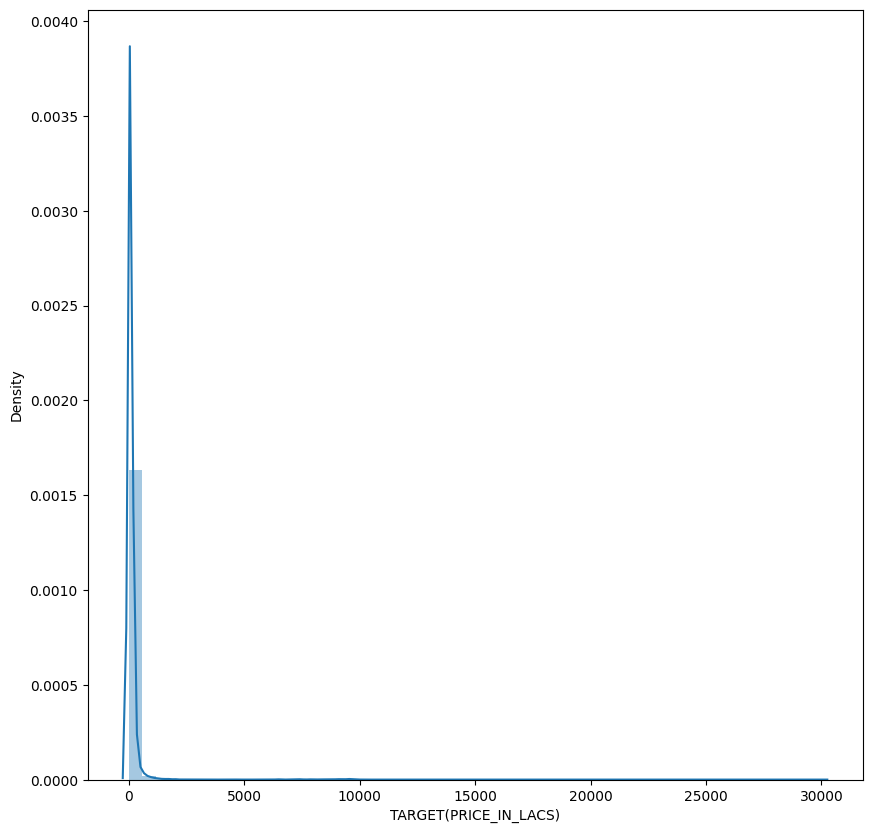

In [ ]:
plt.figure(figsize = (10,10))
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

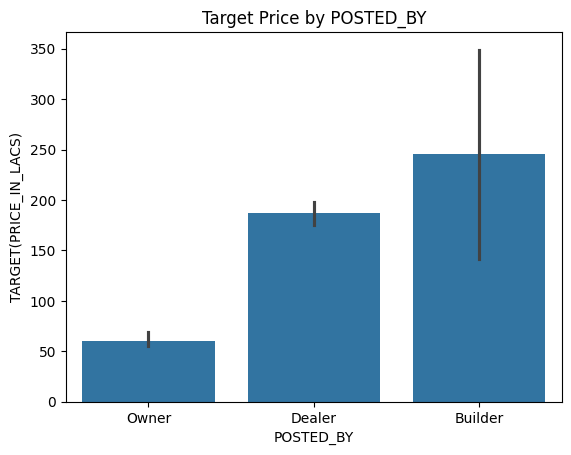

In [ ]:
sns.barplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=df)
plt.title('Target Price by POSTED_BY')
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

Counts for UNDER_CONSTRUCTION:
UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64
****************************************************
Counts for RERA:
RERA
0    20088
1     9363
Name: count, dtype: int64
****************************************************
Counts for BHK_OR_RK:
BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64
****************************************************


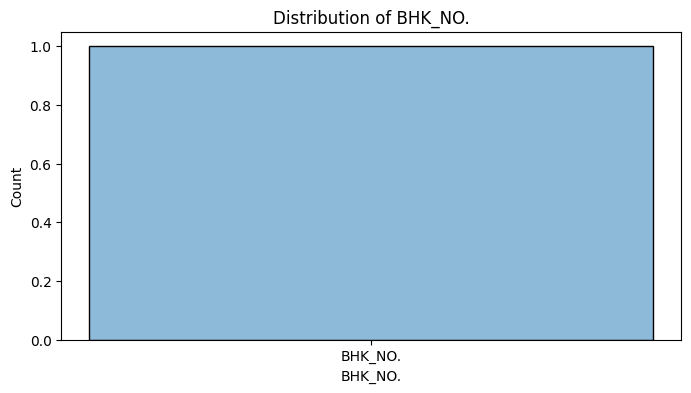

Counts for BHK_NO.:
BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64
****************************************************
Counts for READY_TO_MOVE:
READY_TO_MOVE
1    24157
0     5294
Name: count, dtype: int64
****************************************************
Counts for RESALE:
RESALE
1    27377
0     2074
Name: count, dtype: int64
****************************************************


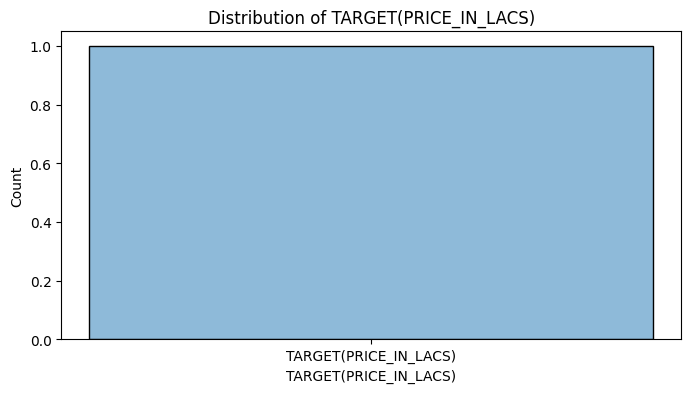

Counts for TARGET(PRICE_IN_LACS):
TARGET(PRICE_IN_LACS)
110.0      795
100.0      770
120.0      652
130.0      598
45.0       583
          ... 
86.1         1
1550.0       1
28000.0      1
9910.0       1
18.3         1
Name: count, Length: 1172, dtype: int64
****************************************************


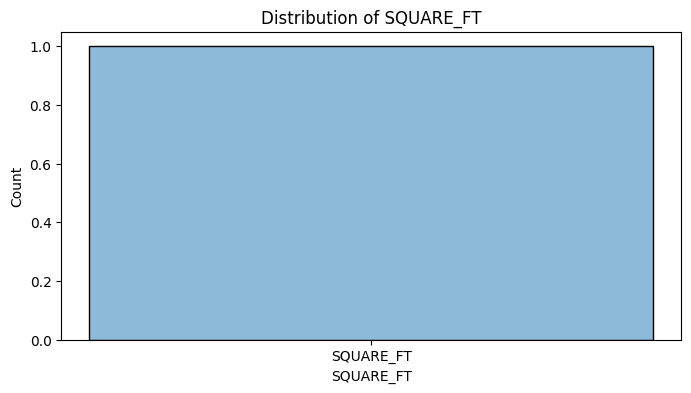

Counts for SQUARE_FT:
SQUARE_FT
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1685.097420      1
1085.176085      1
1300.142248      1
911.002102       1
896.774194       1
Name: count, Length: 19561, dtype: int64
****************************************************


In [ ]:
numerical_useful = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_OR_RK' ,'BHK_NO.', 'READY_TO_MOVE',
       'RESALE', 'TARGET(PRICE_IN_LACS)', 'SQUARE_FT']


for col in numerical_useful:
    d_type = df[col].dtype

    if d_type != "object" and (df[col] > 1).any().any():
        plt.figure(figsize=(8, 4))
        sns.histplot([col], bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(f'{col}')
        plt.show()

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("****************************************************")

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64


<BarContainer object of 2 artists>

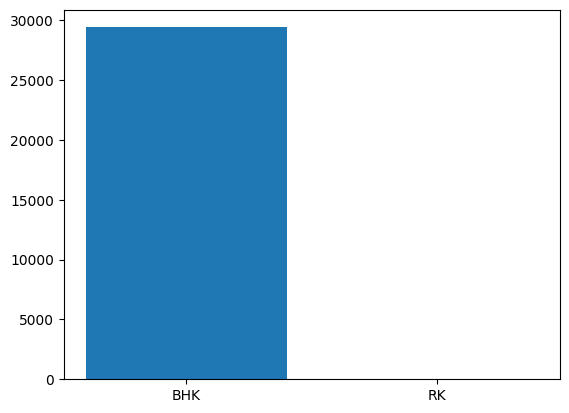

In [ ]:
print(df["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],df["BHK_OR_RK"].value_counts())

In [ ]:
df.drop(['BHK_OR_RK'], axis=1, inplace=True)

In [ ]:
df['CITY'] = df['ADDRESS'].str.split(',').str.get(1)
df['CITY'].value_counts()

,count
CITY,
Bangalore,4319
Lalitpur,2987
Mumbai,2020
Pune,1984
Noida,1765
...,...
ELECTRICITY COLONY,1
Chhindwara,1
Jivarajpark,1


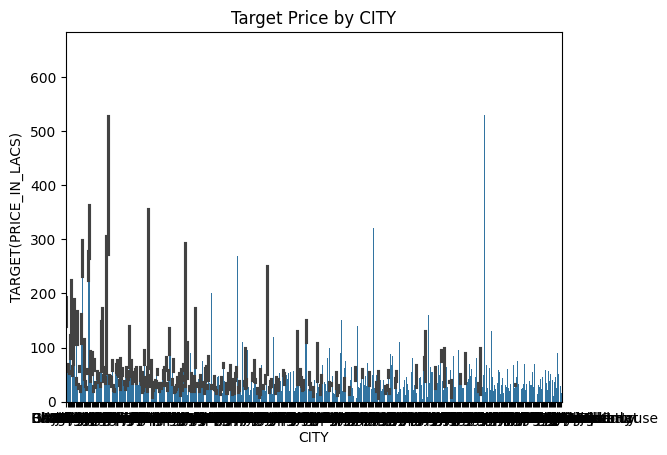

In [ ]:
sns.barplot(x='CITY', y='TARGET(PRICE_IN_LACS)', data=df)
plt.title('Target Price by CITY')
plt.show()

In [ ]:
X=pd.get_dummies(X,dtype=float,drop_first=True)
X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,...,"ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2,999.009247,0,1,22.592200,88.484911,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
DT= DecisionTreeRegressor(max_depth = 5)
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
DT.score(X_test, y_test)

0.9258256247595004

In [ ]:
dt=DT.score(X_train, y_train)
dt

0.9491565729989369